In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [ ]:
df = pd.read_csv('/content/Quality_Concrete.csv')
print(df)

      Unnamed: 0     Chloride  Label  Organic_Carbon       Solids    Sulphate  \
0              0  1119.324168      1      178.253002   526.051381  305.391066   
1              1  1036.079757      1      121.985937   751.978355  202.951022   
2              2  1533.371242      1      100.844370  1940.216276  158.901826   
3              3   530.060453      1      169.685077  1667.346846  312.075730   
4              4  1633.186960      1      148.456935  1401.681101  204.934673   
...          ...          ...    ...             ...          ...         ...   
9995        1995  1160.140252      1       62.559394  1830.670755  170.911606   
9996        1996  1810.432422      1      104.346350  1991.803437  282.877402   
9997        1997  1039.441333      1      172.193162   919.904749  160.812509   
9998        1998  1637.732218      0      183.601604  1161.583133   83.375289   
9999        1999   927.936309      0       99.094721   880.554869  104.313935   

        Turbidity        ph

**data preprocessing**

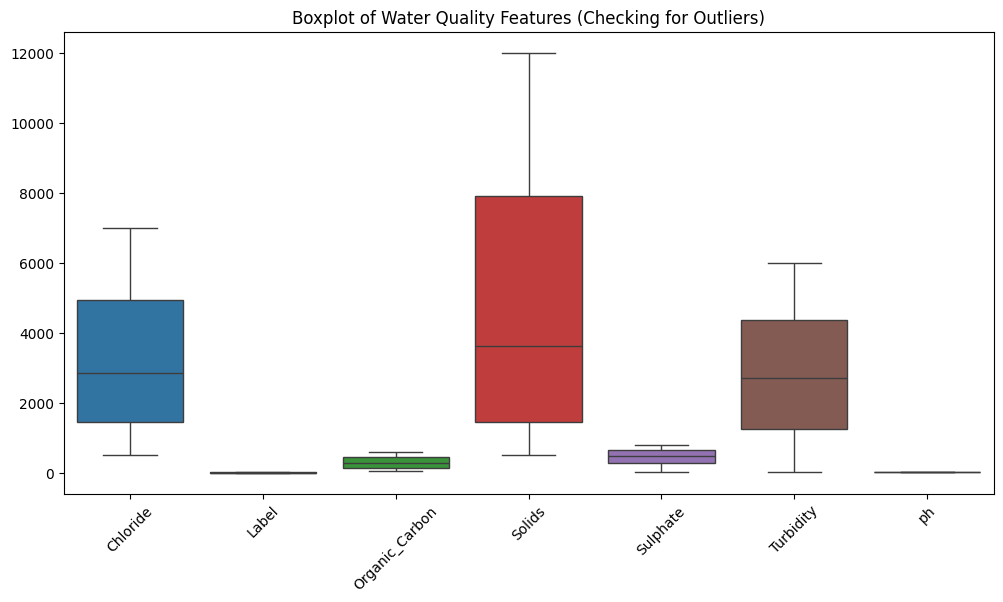

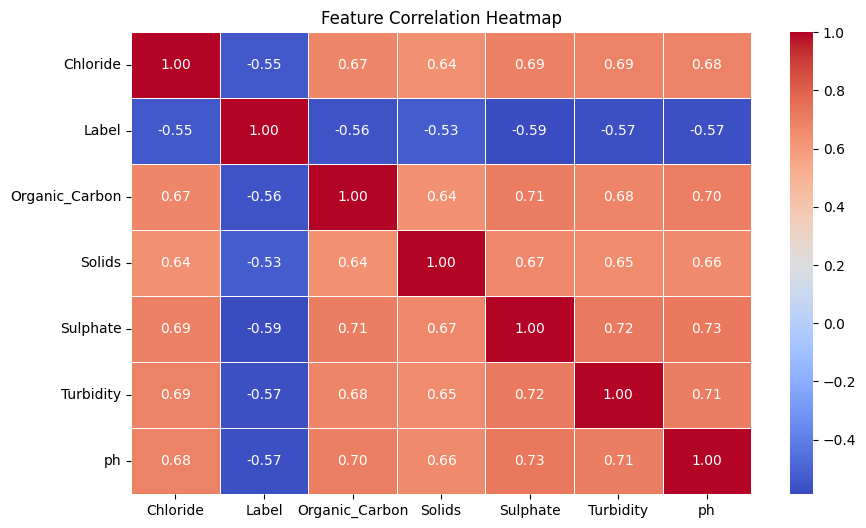

Features shape: (10000, 6)
Target shape: (10000,)


In [ ]:
#dataset
df = pd.read_csv('/content/Quality_Concrete.csv') # dataset path file path
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
# Fill missing values using the column mean (you can change the strategy if needed)
df.fillna(df.mean(), inplace=True)

# Data Visualization: Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Water Quality Features (Checking for Outliers)")
plt.xticks(rotation=45)
plt.show()

# Data Visualization: Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
# preprocessing data
x= df.drop('Label', axis=1)
y= df['Label']

scaler = StandardScaler()
x = scaler.fit_transform(x)
print("Features shape:", x.shape)
print("Target shape:", y.shape)


**Splitting the Data**

In [ ]:
def split_data(x,y,test_size=0.2,random_state=42):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state, stratify=y)
  return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test = split_data(x,y)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (8000, 7)
x_test shape: (2000, 7)
y_train shape: (8000,)
y_test shape: (2000,)


**Traning the modal **

In [ ]:
def train_model(x_train,y_train):
  model = RandomForestClassifier(n_estimators=100,random_state=42)
  model.fit(x_train,y_train)
  return model

model = train_model(x_train,y_train)

evaluting the model

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82      1302
           1       0.66      0.62      0.64       698

    accuracy                           0.76      2000
   macro avg       0.73      0.72      0.73      2000
weighted avg       0.75      0.76      0.75      2000

Accuracy: 0.7565
Precision: 0.6616
Recall (Sensitivity): 0.6189
F1-Score: 0.6395
Specificity: 0.8303


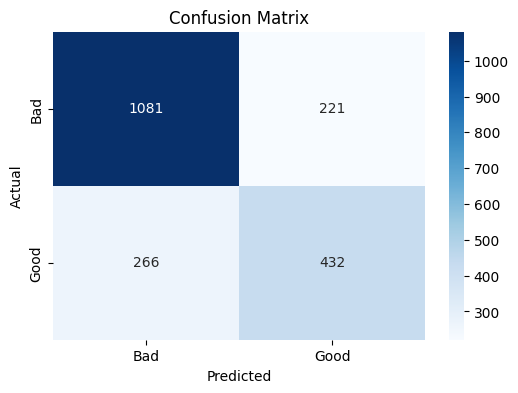

In [ ]:
def evaluting_model(model,x_test,y_test):
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  conf_matrix = confusion_matrix(y_test,y_pred)
  class_report = classification_report(y_test,y_pred)
  tn, fp, fn, tp = conf_matrix.ravel()
  # Sensitivity is the recall for the positive class: TP / (TP + FN)
  sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0

    # Specificity is TN / (TN + fp)
  specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

  print("Classification Report:")
  print(classification_report(y_test, y_pred, zero_division=0))
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall (Sensitivity): {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"Specificity: {specificity:.4f}")
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

evaluting_model(model, x_test, y_test)